In [51]:
import torch
import os,glob
from moviepy.editor import *
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt   
import librosa as rs
import json
import cv2

## PATH

In [52]:
dir_LRS = "/home/data/kbh/DSS/LRS/v8/test/"
id_target = "90"


path_label = "{}/label/{}.json".format(dir_LRS,id_target)
path_noisy = "{}/noisy/{}.wav".format(dir_LRS,id_target)
path_clean = "{}/clean/{}_0.wav".format(dir_LRS,id_target)

f = open(path_label,'r')
label = json.load(f)
print(label)

path_vid = "/home/data/kbh/lip/LRS3/test/{}/{}.pt".format(label["class_videos"][0],label["id_videos"][0])

{'angles': [40], 'n_src': 1, 'mic_pos': [[0.0372, 0.0215, 0], [0.0372, -0.0215, 0], [-0.0372, -0.0215, 0], [-0.0372, 0.0215, 0]], 'SIR': 4.663490983791141, 'scale_dB': -29.249018100720402, 'SNR': 4.384567511171992, 'start_speech': [19269], 'idx_speech': [2496], 'len_speech': [20736], 'start_face': [30], 'idx_face': [3], 'len_face': [32], 'id_videos': ['00008'], 'class_videos': ['eVFYhbHpfqU'], 'n_sample': 48000, 'n_frame': 75, 'FPS': [44100]}


## Audio

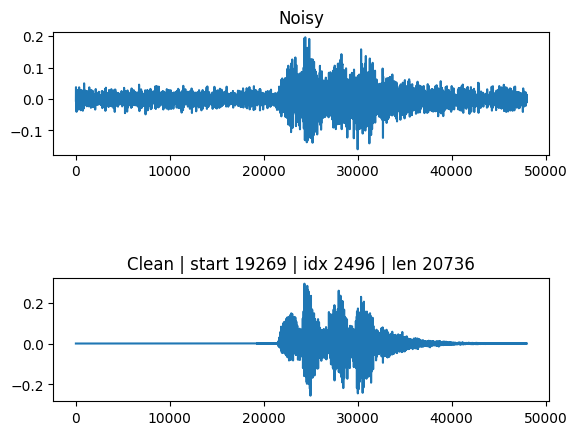

In [53]:
noisy, _ = rs.load(path_noisy,sr=16000)
plt.figure()
ax = plt.subplot(2,1,1)
plt.subplots_adjust(hspace=1)

ax.set_title("Noisy")
plt.plot(noisy)

clean, _ = rs.load(path_clean,sr=16000)
ax = plt.subplot(2,1,2)
ax.set_title("Clean | start {} | idx {} | len {}".format(label["start_speech"][0],label["idx_speech"][0],label["len_speech"][0]))

plt.plot(clean)

## Video

In [54]:
vid = torch.load(path_vid)()
print(label["n_frame"])
print(vid.shape)
print(" start {} | idx {} | len {}".format(label["start_face"][0],label["idx_face"][0],label["len_face"][0]))

75
torch.Size([29, 96, 96])
 start 30 | idx 3 | len 32
